In [1]:
import spotipy.util as util
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import json
import time
import sys
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from collections import OrderedDict
from math import log
import calmap
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
from pprint import pprint

4.8.1


In [2]:
init_notebook_mode(connected=True)

In [3]:
with open(r'Spotify Data\StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

pprint(data[:5])

[{'artistName': 'Don Lore V',
  'endTime': '2019-07-01 10:59',
  'msPlayed': 5098,
  'trackName': 'Danza Kuduro - Original Mix'},
 {'artistName': 'Maroon 5',
  'endTime': '2019-07-02 04:33',
  'msPlayed': 0,
  'trackName': 'Girls Like You'},
 {'artistName': 'Fort Minor',
  'endTime': '2019-07-02 04:33',
  'msPlayed': 0,
  'trackName': 'Remember the Name (feat. Styles of Beyond)'},
 {'artistName': 'The Weeknd',
  'endTime': '2019-07-02 04:33',
  'msPlayed': 0,
  'trackName': 'Starboy'},
 {'artistName': 'Maroon 5',
  'endTime': '2019-07-02 04:33',
  'msPlayed': 0,
  'trackName': 'Wait'}]


In [4]:
spotify_data = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

spotify_data['artist_name'] = extract_json_value('artistName')
spotify_data['end_time'] = extract_json_value('endTime')
spotify_data['ms_played'] = extract_json_value('msPlayed')
spotify_data['track_name'] = extract_json_value('trackName')

In [5]:
with open(r'Spotify Data\StreamingHistory1.json', encoding='utf8') as f:
    data = json.load(f)

pprint(data[:5])

[{'artistName': 'Maroon 5',
  'endTime': '2019-12-08 07:46',
  'msPlayed': 0,
  'trackName': 'Maps'},
 {'artistName': 'Meghan Trainor',
  'endTime': '2019-12-08 07:46',
  'msPlayed': 0,
  'trackName': "Like I'm Gonna Lose You (feat. John Legend)"},
 {'artistName': 'Maroon 5',
  'endTime': '2019-12-08 07:46',
  'msPlayed': 0,
  'trackName': 'Love Somebody'},
 {'artistName': 'Little Mix',
  'endTime': '2019-12-08 07:46',
  'msPlayed': 1926,
  'trackName': 'Woman Like Me (feat. Nicki Minaj)'},
 {'artistName': 'Little Mix',
  'endTime': '2019-12-08 07:46',
  'msPlayed': 0,
  'trackName': 'Woman Like Me (feat. Nicki Minaj)'}]


In [6]:
spotify_data1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

spotify_data1['artist_name'] = extract_json_value('artistName')
spotify_data1['end_time'] = extract_json_value('endTime')
spotify_data1['ms_played'] = extract_json_value('msPlayed')
spotify_data1['track_name'] = extract_json_value('trackName')

In [7]:
spotify_data = spotify_data.append(spotify_data1, ignore_index=True)
cond = spotify_data['ms_played']!=0
spotify_data = spotify_data[cond]
spotify_data = spotify_data.reset_index(drop= True)
spotify_data

,artist_name,end_time,ms_played,track_name
0,Don Lore V,2019-07-01 10:59,5098,Danza Kuduro - Original Mix
1,Maroon 5,2019-07-02 04:37,215229,Girls Like You
2,Maroon 5,2019-07-02 04:53,190642,Wait
3,Fall Out Boy,2019-07-02 04:53,615,The Last Of The Real Ones
4,Fall Out Boy,2019-07-02 04:58,230400,The Last Of The Real Ones
...,...,...,...,...
12914,Lynyrd Skynyrd,2020-07-02 16:25,234099,Free Bird
12915,Pink Floyd,2020-07-02 16:26,94231,Comfortably Numb
12916,AC/DC,2020-07-02 16:30,210880,You Shook Me All Night Long
12917,Pink Floyd,2020-07-02 16:30,22012,"Another Brick in the Wall, Pt. 2"


In [14]:
songs = spotify_data.sort_values('ms_played',ascending =False)
songs = songs.drop_duplicates(subset =['track_name'],keep='first')
songs = songs.reset_index(drop=True)
songs

,artist_name,end_time,ms_played,track_name
0,Kumar Gandharva,2019-12-02 14:54,737531,Runanubandhachya
1,Miles Davis,2019-12-31 21:47,692745,All Blues
2,The Weeknd,2020-05-04 05:45,621062,In Your Eyes
3,Lynyrd Skynyrd,2019-10-01 04:17,614118,Free Bird
4,Miles Davis,2019-12-31 22:05,562620,So What
...,...,...,...,...
2877,Harshdeep Kaur,2019-11-23 17:43,10,Jaisi Teri Marzi
2878,Ajay-Atul,2019-12-01 18:28,7,Abhi Mujh Mein Kahin
2879,girl in red,2020-02-27 19:26,5,watch you sleep.
2880,Pitbull,2019-11-23 13:48,3,Time of Our Lives


In [9]:
#Generate token - If generated it uses the existing
username = '9cjfei8bx9vq78vel4odrjd3y'
client_id ='f2018fb393c2424dba2844c31e8e2c18'
client_secret = 'f4bb9567dafc4625877be647542fd919'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played user-top-read playlist-read-private user-library-read user-follow-read'

token = util.prompt_for_user_token(username=username, 
scope=scope, 
client_id=client_id,   
client_secret=client_secret,     
redirect_uri=redirect_uri)

sp = spotipy.Spotify(auth=token)

In [10]:
import requests
def get_id(track_name: str,artist_name: str, token: str) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
    params = [
    ('q', track_name + ' ' + artist_name),
    ('type', 'track'),
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        #print(json)
        first_result = json['tracks']['items'][0]
        #print(first_result)
        track_id = first_result['id']
        return track_id
    except:
        return None


In [11]:
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        #print(features)
        return features[0]
    except:
        return None

In [15]:
all_features = []
for i in range(0,len(songs)):
    track_id = songs.iloc[i,1]
    features = get_features(track_id, token)
    if features:
        all_features.append(features)

PLAYLISTS

In [9]:
my_playlist =  pd.DataFrame(columns=["id", "spotify_id","list_name"])

client_credentials_manager = SpotifyClientCredentials(client_id='f2018fb393c2424dba2844c31e8e2c18', 
                                                      client_secret='f4bb9567dafc4625877be647542fd919')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists('9cjfei8bx9vq78vel4odrjd3y') # input your spotify account id here

In [10]:
while playlists:
    for i, playlist in enumerate(playlists['items']): 
        spotifyid = playlist['id'] 
        listname = playlist['name'] 
        my_playlist = my_playlist.append({'id':i+1 , 
                        'spotify_id': spotifyid,
                        'list_name': listname
                        }, ignore_index=True)
        
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

my_playlist

,id,spotify_id,list_name
0,1,41Vv65OvMN6xtXiXpBaJ19,Current
1,2,0zS1zom7QfMhpIyLkLpRJa,Run
2,3,3VOJChdLseH7mQS0I1B28W,Hindi
3,4,7fQZgMLfn5IOyxB0olepjP,Alt
4,5,2bltokndQML4dMUlCwOYMI,Calm
5,6,5gR0vv5wij1UeZKNYc3Mbb,1
6,7,0BNDa2ifr1JwwPSfHVxdi8,Jazz


In [11]:
my_song =  pd.DataFrame(columns=["list_id", "song_id","song_name","artist","popularity",'release_date']
                       )


for listid in my_playlist["spotify_id"]:
    songs = []
    content = sp.user_playlist_tracks("aujpv9lfhoctyrmyo8kpew77w", listid, fields=None, limit=100, offset=0, market=None)
    songs += content['items']
    for song in songs:
        my_song = my_song.append({"list_id" : listid,
                                  "song_id":song['track']['id'],
                                  "song_name":song['track']['name'],
                                  "artist":song['track']['artists'][0]['name'],
                                  "popularity": song['track']['popularity'],
                                  "release_date": song['track']['album']['release_date']},ignore_index=True)

In [12]:
my_song

,list_id,song_id,song_name,artist,popularity,release_date
0,41Vv65OvMN6xtXiXpBaJ19,3kwgqoBqTwoAH4nT29TYrq,Nobody's Love,Maroon 5,83,2020-07-24
1,41Vv65OvMN6xtXiXpBaJ19,44gz3bzhdcGUFgA5oc1wSu,Holiday,Little Mix,77,2020-07-24
2,41Vv65OvMN6xtXiXpBaJ19,2p8IUWQDrpjuFltbdgLOag,After Hours,The Weeknd,82,2020-03-20
3,41Vv65OvMN6xtXiXpBaJ19,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,86,2018-12-14
4,41Vv65OvMN6xtXiXpBaJ19,4JIo8RztBbELr2gWJ5OGK6,Secret Love Song (feat. Jason Derulo),Little Mix,77,2015-11-06
...,...,...,...,...,...,...
144,0BNDa2ifr1JwwPSfHVxdi8,6rsONFhS7Jlfb0xf6vteOR,Relaxing Jazz,Cafe Music BGM channel,6,2017-11-07
145,0BNDa2ifr1JwwPSfHVxdi8,1qCQTy0fTXerET4x8VHyr9,What A Wonderful World,Louis Armstrong,73,1968
146,0BNDa2ifr1JwwPSfHVxdi8,5o3DSHw1ORhM3lWxqGRvEf,All Blues,Miles Davis,50,1959-08-17
147,0BNDa2ifr1JwwPSfHVxdi8,0aWMVrwxPNYkKmFthzmpRi,Blue in Green,Miles Davis,64,1959-08-17


In [18]:
all_features = []
for i in range(0,len(my_song)):
    track_id = my_song.iloc[i,1]
    features = get_features(track_id, token)
    if features:
        all_features.append(features)

In [22]:
my_feature =pd.DataFrame(all_features)
my_feature

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.486,0.5670,1,-6.456,1,0.0379,0.3100,0.000000,0.0949,0.154,93.680,audio_features,3kwgqoBqTwoAH4nT29TYrq,spotify:track:3kwgqoBqTwoAH4nT29TYrq,https://api.spotify.com/v1/tracks/3kwgqoBqTwoA...,https://api.spotify.com/v1/audio-analysis/3kwg...,211254,4
1,0.712,0.6760,5,-5.965,1,0.1840,0.0760,0.000000,0.0669,0.648,106.156,audio_features,44gz3bzhdcGUFgA5oc1wSu,spotify:track:44gz3bzhdcGUFgA5oc1wSu,https://api.spotify.com/v1/tracks/44gz3bzhdcGU...,https://api.spotify.com/v1/audio-analysis/44gz...,213597,4
2,0.664,0.5720,5,-6.099,0,0.0305,0.0811,0.006040,0.1210,0.143,108.959,audio_features,2p8IUWQDrpjuFltbdgLOag,spotify:track:2p8IUWQDrpjuFltbdgLOag,https://api.spotify.com/v1/tracks/2p8IUWQDrpju...,https://api.spotify.com/v1/audio-analysis/2p8I...,361027,4
3,0.760,0.4790,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
4,0.534,0.6420,9,-3.971,1,0.0504,0.2590,0.000000,0.2900,0.131,92.963,audio_features,4JIo8RztBbELr2gWJ5OGK6,spotify:track:4JIo8RztBbELr2gWJ5OGK6,https://api.spotify.com/v1/tracks/4JIo8RztBbEL...,https://api.spotify.com/v1/audio-analysis/4JIo...,249813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.732,0.2970,9,-15.395,1,0.0331,0.9000,0.633000,0.1360,0.313,116.013,audio_features,6rsONFhS7Jlfb0xf6vteOR,spotify:track:6rsONFhS7Jlfb0xf6vteOR,https://api.spotify.com/v1/tracks/6rsONFhS7Jlf...,https://api.spotify.com/v1/audio-analysis/6rsO...,205364,4
145,0.399,0.2580,5,-16.028,1,0.0330,0.7920,0.000002,0.1280,0.192,108.174,audio_features,1qCQTy0fTXerET4x8VHyr9,spotify:track:1qCQTy0fTXerET4x8VHyr9,https://api.spotify.com/v1/tracks/1qCQTy0fTXer...,https://api.spotify.com/v1/audio-analysis/1qCQ...,137520,3
146,0.508,0.1490,0,-18.305,1,0.0313,0.7710,0.004740,0.1150,0.365,139.444,audio_features,5o3DSHw1ORhM3lWxqGRvEf,spotify:track:5o3DSHw1ORhM3lWxqGRvEf,https://api.spotify.com/v1/tracks/5o3DSHw1ORhM...,https://api.spotify.com/v1/audio-analysis/5o3D...,692747,3
147,0.421,0.0161,2,-25.358,0,0.0374,0.8100,0.002100,0.0978,0.160,110.926,audio_features,0aWMVrwxPNYkKmFthzmpRi,spotify:track:0aWMVrwxPNYkKmFthzmpRi,https://api.spotify.com/v1/tracks/0aWMVrwxPNYk...,https://api.spotify.com/v1/audio-analysis/0aWM...,337733,4


In [23]:
song_feature = pd.merge(my_song,my_feature,how='left',left_on='song_id', right_on='id')

In [25]:
list_song_feature = pd.merge(my_playlist,song_feature,how='left',left_on='spotify_id', right_on='list_id')
list_song_feature

,id_x,spotify_id,list_name,list_id,song_id,song_name,artist,popularity,release_date,danceability,...,liveness,valence,tempo,type,id_y,uri,track_href,analysis_url,duration_ms,time_signature
0,1,41Vv65OvMN6xtXiXpBaJ19,Current,41Vv65OvMN6xtXiXpBaJ19,3kwgqoBqTwoAH4nT29TYrq,Nobody's Love,Maroon 5,83,2020-07-24,0.486,...,0.0949,0.154,93.680,audio_features,3kwgqoBqTwoAH4nT29TYrq,spotify:track:3kwgqoBqTwoAH4nT29TYrq,https://api.spotify.com/v1/tracks/3kwgqoBqTwoA...,https://api.spotify.com/v1/audio-analysis/3kwg...,211254,4
1,1,41Vv65OvMN6xtXiXpBaJ19,Current,41Vv65OvMN6xtXiXpBaJ19,44gz3bzhdcGUFgA5oc1wSu,Holiday,Little Mix,77,2020-07-24,0.712,...,0.0669,0.648,106.156,audio_features,44gz3bzhdcGUFgA5oc1wSu,spotify:track:44gz3bzhdcGUFgA5oc1wSu,https://api.spotify.com/v1/tracks/44gz3bzhdcGU...,https://api.spotify.com/v1/audio-analysis/44gz...,213597,4
2,1,41Vv65OvMN6xtXiXpBaJ19,Current,41Vv65OvMN6xtXiXpBaJ19,2p8IUWQDrpjuFltbdgLOag,After Hours,The Weeknd,82,2020-03-20,0.664,...,0.1210,0.143,108.959,audio_features,2p8IUWQDrpjuFltbdgLOag,spotify:track:2p8IUWQDrpjuFltbdgLOag,https://api.spotify.com/v1/tracks/2p8IUWQDrpju...,https://api.spotify.com/v1/audio-analysis/2p8I...,361027,4
3,1,41Vv65OvMN6xtXiXpBaJ19,Current,41Vv65OvMN6xtXiXpBaJ19,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,86,2018-12-14,0.760,...,0.0703,0.913,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4
4,1,41Vv65OvMN6xtXiXpBaJ19,Current,41Vv65OvMN6xtXiXpBaJ19,4JIo8RztBbELr2gWJ5OGK6,Secret Love Song (feat. Jason Derulo),Little Mix,77,2015-11-06,0.534,...,0.2900,0.131,92.963,audio_features,4JIo8RztBbELr2gWJ5OGK6,spotify:track:4JIo8RztBbELr2gWJ5OGK6,https://api.spotify.com/v1/tracks/4JIo8RztBbEL...,https://api.spotify.com/v1/audio-analysis/4JIo...,249813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,7,0BNDa2ifr1JwwPSfHVxdi8,Jazz,0BNDa2ifr1JwwPSfHVxdi8,6rsONFhS7Jlfb0xf6vteOR,Relaxing Jazz,Cafe Music BGM channel,6,2017-11-07,0.732,...,0.1360,0.313,116.013,audio_features,6rsONFhS7Jlfb0xf6vteOR,spotify:track:6rsONFhS7Jlfb0xf6vteOR,https://api.spotify.com/v1/tracks/6rsONFhS7Jlf...,https://api.spotify.com/v1/audio-analysis/6rsO...,205364,4
177,7,0BNDa2ifr1JwwPSfHVxdi8,Jazz,0BNDa2ifr1JwwPSfHVxdi8,1qCQTy0fTXerET4x8VHyr9,What A Wonderful World,Louis Armstrong,73,1968,0.399,...,0.1280,0.192,108.174,audio_features,1qCQTy0fTXerET4x8VHyr9,spotify:track:1qCQTy0fTXerET4x8VHyr9,https://api.spotify.com/v1/tracks/1qCQTy0fTXer...,https://api.spotify.com/v1/audio-analysis/1qCQ...,137520,3
178,7,0BNDa2ifr1JwwPSfHVxdi8,Jazz,0BNDa2ifr1JwwPSfHVxdi8,5o3DSHw1ORhM3lWxqGRvEf,All Blues,Miles Davis,50,1959-08-17,0.508,...,0.1150,0.365,139.444,audio_features,5o3DSHw1ORhM3lWxqGRvEf,spotify:track:5o3DSHw1ORhM3lWxqGRvEf,https://api.spotify.com/v1/tracks/5o3DSHw1ORhM...,https://api.spotify.com/v1/audio-analysis/5o3D...,692747,3
179,7,0BNDa2ifr1JwwPSfHVxdi8,Jazz,0BNDa2ifr1JwwPSfHVxdi8,0aWMVrwxPNYkKmFthzmpRi,Blue in Green,Miles Davis,64,1959-08-17,0.421,...,0.0978,0.160,110.926,audio_features,0aWMVrwxPNYkKmFthzmpRi,spotify:track:0aWMVrwxPNYkKmFthzmpRi,https://api.spotify.com/v1/tracks/0aWMVrwxPNYk...,https://api.spotify.com/v1/audio-analysis/0aWM...,337733,4


In [26]:
list_song_feature['popularity'] = pd.to_numeric(list_song_feature["popularity"],downcast='integer')

In [33]:
def convert_scale(df,col):
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col+'_adj']=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

convert_scale(list_song_feature,'loudness')

In [34]:
col_radar_feature = ['acousticness','danceability','energy','instrumentalness','valence','loudness_adj']
feature_mean = list_song_feature.groupby('list_name').mean()[col_radar_feature]
feature_mean

,acousticness,danceability,energy,instrumentalness,valence,loudness_adj
list_name,,,,,,
1,0.138427,0.537016,0.718828,0.019754,0.483234,0.828024
Alt,0.196131,0.478000,0.721048,0.011379,0.522048,0.800593
Calm,0.563158,0.498895,0.456947,0.021954,0.453211,0.667785
Current,0.095686,0.528259,0.724519,0.052100,0.520630,0.839330
Hindi,0.274004,0.621333,0.665333,0.007749,0.521400,0.750691
Jazz,0.758727,0.474545,0.243191,0.202846,0.325182,0.417530
Run,0.044314,0.458125,0.844167,0.012086,0.564458,0.827274


In [35]:
col_radar_feature = ['acousticness','danceability','energy','instrumentalness','valence','loudness_adj']

def draw_radar(list1,list2,list3, list4,color1,color2,color3,color4):
    # Each attribute we'll plot in the radar chart.
    labels = col_radar_feature

    # Let's look at the list[K-pop] and plot it.
    values1 = feature_mean.loc[list1].tolist()
    values2 = feature_mean.loc[list2].tolist()
    values3 = feature_mean.loc[list3].tolist()
    values4 = feature_mean.loc[list4].tolist()

    # Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


    # Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]
    values3 += values3[:1]
    values4 += values4[:1]

    # ax = plt.subplot(polar=True)
    fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(14, 14), subplot_kw=dict(polar=True))
    ax1.plot(angles,values1,color=color1, linewidth=1)
    ax1.fill(angles,values1,color=color1, alpha=0.6)
    ax2.plot(angles,values2,color=color2, linewidth=1)
    ax2.fill(angles,values2,color=color2, alpha=0.6)
    ax3.plot(angles,values3,color=color3, linewidth=1)
    ax3.fill(angles,values3,color=color3, alpha=0.6)
    ax4.plot(angles,values4,color=color4, linewidth=1)
    ax4.fill(angles,values4,color=color4, alpha=0.6)


    # Fix axis to go in the right order and start at 12 o'clock.
    ax1.set_theta_offset(np.pi / 2)
    ax1.set_theta_direction(-1)
    ax2.set_theta_offset(np.pi / 2)
    ax2.set_theta_direction(-1)
    ax3.set_theta_offset(np.pi / 2)
    ax3.set_theta_direction(-1)
    ax4.set_theta_offset(np.pi / 2)
    ax4.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax1.set_thetagrids(np.degrees(angles), labels)
    ax2.set_thetagrids(np.degrees(angles), labels)
    ax3.set_thetagrids(np.degrees(angles), labels)
    ax4.set_thetagrids(np.degrees(angles), labels)
    


    # Set title
    ax1.set_title('{} {}'.format('Playlist: ', list1), y=1.08)
    ax2.set_title('{} {}'.format('Playlist: ', list2), y=1.08)
    ax3.set_title('{} {}'.format('Playlist: ', list3), y=1.08)
    ax4.set_title('{} {}'.format('Playlist: ', list4), y=1.08)

    # You can also set gridlines manually like this:
    ax1.set_rgrids([0, 0.2, 0.4, 0.6, 0.8,1])
    ax2.set_rgrids([0, 0.2, 0.4, 0.6, 0.8,1])
    ax3.set_rgrids([0, 0.2, 0.4, 0.6, 0.8,1])
    ax4.set_rgrids([0, 0.2, 0.4, 0.6, 0.8,1])
    
    return

In [36]:
feature_mean.index.values

array(['1', 'Alt', 'Calm', 'Current', 'Hindi', 'Jazz', 'Run'],
      dtype=object)

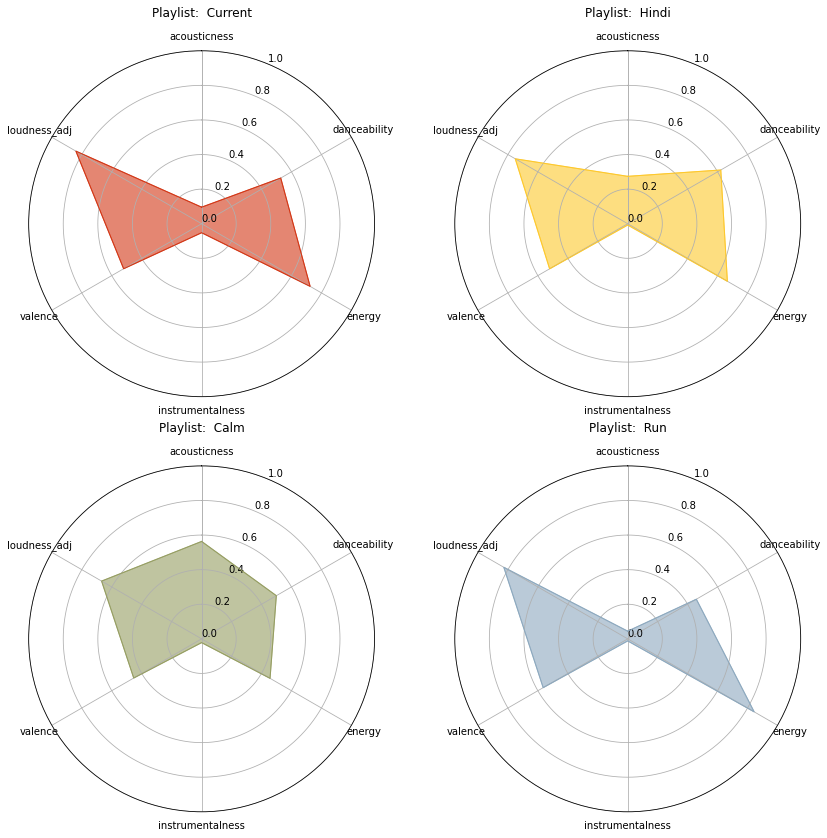

In [39]:
draw_radar(feature_mean.index.values[3],feature_mean.index.values[4],feature_mean.index.values[2],feature_mean.index.values[6],
           '#d23514','#fdc82c','#959d61','#8ca8be')

In [40]:
list_song_feature["list_name"].unique()


array(['Current', 'Run', 'Hindi', 'Alt', 'Calm', '1', 'Jazz'],
      dtype=object)

In [42]:
fig = go.Figure()

playlists = list_song_feature["list_name"].unique()

for playlist in playlists:
    fig.add_trace(go.Box(x=list_song_feature['list_name'][list_song_feature['list_name'] == playlist],
                            y=list_song_feature['popularity'][list_song_feature['list_name'] == playlist],
                            name=playlist,
                            marker_color='rgb(129,180,227)'
                            ))
fig.update_traces(
                  boxpoints='all', # show all points
                  ) 
fig.update_layout(showlegend=False,xaxis_tickangle=-30,
                 title="Distribution of track popularity",
                  xaxis_title="Playlist")
plotly.offline.plot(fig)

'temp-plot.html'